<div style="color:black">

# 📊 P7: Predictive Machine Learning Project 🚀
**Author: Angie Crews**  

[GitHub Project Repository](https://github.com/Angie-Crews/datafun-07-ml)

</div>

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f4e5.svg" alt="import icon" width="32" style="vertical-align:middle"> ***01 Import Statements***

</div>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f4a1.svg" alt="action icon" width="32" style="vertical-align:middle"> ***02 CC: Chart a Straight Line (Part 1)***

</div>

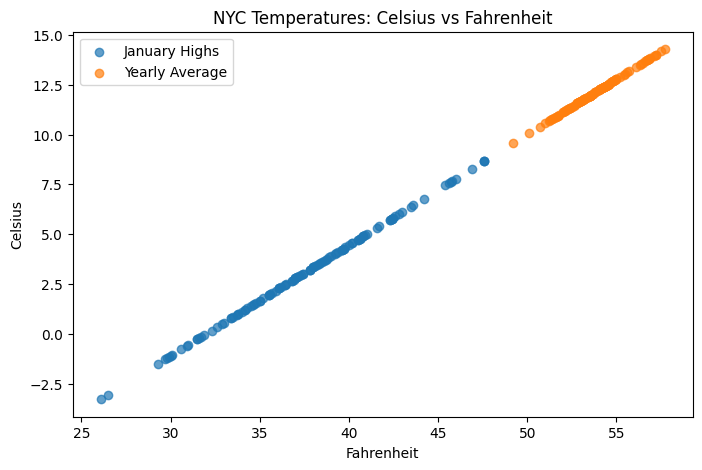

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV files into pandas dataframes
df_jan = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
df_yearly = pd.read_csv('ave_yearly_temp_nyc_1895-2017.csv')

# Assuming the temperature columns are in Fahrenheit, convert to Celsius
df_jan['Celsius'] = (df_jan['Value'] - 32) * 5/9
df_yearly['Celsius'] = (df_yearly['Value'] - 32) * 5/9

# Plot Celsius vs Fahrenheit for January highs
plt.figure(figsize=(8, 5))
plt.scatter(df_jan['Value'], df_jan['Celsius'], label='January Highs', alpha=0.7)
plt.scatter(df_yearly['Value'], df_yearly['Celsius'], label='Yearly Average', alpha=0.7)
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')
plt.title('NYC Temperatures: Celsius vs Fahrenheit')
plt.legend()
plt.show()